In [ ]:
import numpy as np
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/master_dis_data_-_data_file_1_-_Sheet1.csv")

In [ ]:
df

,Words,Framework
0,Variant,I
1,Omicrin,NaN
2,covid-19,P
3,sars-cov-2,P
4,concern,C
...,...,...
86,virus,C
87,infected,C
88,domain,P
89,test,I


In [ ]:
df.isna().sum()

Words        0
Framework    1
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Words,Framework
0,Variant,I
2,covid-19,P
3,sars-cov-2,P
4,concern,C
5,health,P
...,...,...
86,virus,C
87,infected,C
88,domain,P
89,test,I


#Classifiers

label encoding is done

In [ ]:
df['Framework'] = df['Framework'].astype("category")

In [ ]:
df["Framework_cat"] = df["Framework"].cat.codes

In [ ]:
df['Words'] = df['Words'].astype('category')

In [ ]:
df["Words_cat"] = df["Words"].cat.codes

In [ ]:
df

,Words,Framework,Framework_cat,Words_cat
0,Variant,I,1,0
2,covid-19,P,3,14
3,sars-cov-2,P,3,48
4,concern,C,0,11
5,health,P,3,21
...,...,...,...,...
86,virus,C,0,62
87,infected,C,0,26
88,domain,P,3,19
89,test,I,1,55


In [ ]:
df.drop(["Words","Framework"],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
df

,Framework_cat,Words_cat
0,1,0
2,3,14
3,3,48
4,0,11
5,3,21
...,...,...
86,0,62
87,0,26
88,3,19
89,1,55


In [ ]:
X = df['Words_cat']
Y = df['Framework_cat']


In [ ]:
X

0      0
2     14
3     48
4     11
5     21
      ..
86    62
87    26
88    19
89    55
90    56
Name: Words_cat, Length: 90, dtype: int8

In [ ]:
Y

0     1
2     3
3     3
4     0
5     3
     ..
86    0
87    0
88    3
89    1
90    1
Name: Framework_cat, Length: 90, dtype: int8

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
             X, Y, test_size = 0.3, random_state = 0)

In [ ]:
y_test

3     3
14    3
54    0
42    1
67    2
31    2
46    0
44    3
79    0
90    1
8     2
27    2
34    0
64    1
9     2
17    2
25    2
57    1
78    0
43    3
23    3
7     2
62    3
49    3
81    3
55    2
74    3
Name: Framework_cat, dtype: int8

In [ ]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test  = y_test.to_numpy()

In [ ]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test  = y_test.reshape(-1,1)

In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [ ]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.7142857142857143, 0.4074074074074074]
3 : [0.6349206349206349, 0.37037037037037035]
4 : [0.6031746031746031, 0.5185185185185185]
5 : [0.5714285714285714, 0.37037037037037035]
6 : [0.5396825396825397, 0.37037037037037035]
7 : [0.49206349206349204, 0.3333333333333333]
8 : [0.5714285714285714, 0.4074074074074074]
9 : [0.42857142857142855, 0.3333333333333333]
10 : [0.38095238095238093, 0.3333333333333333]
11 : [0.4444444444444444, 0.4074074074074074]
12 : [0.4444444444444444, 0.3333333333333333]
13 : [0.36507936507936506, 0.3333333333333333]
14 : [0.36507936507936506, 0.2962962962962963]
15 : [0.31746031746031744, 0.25925925925925924]
16 : [0.31746031746031744, 0.2962962962962963]
17 : [0.30158730158730157, 0.2962962962962963]
18 : [0.31746031746031744, 0.2222222222222222]
19 : [0.3492063492063492, 0.2962962962962963]
20 : [0.2857142857142857, 0.2962962962962963]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


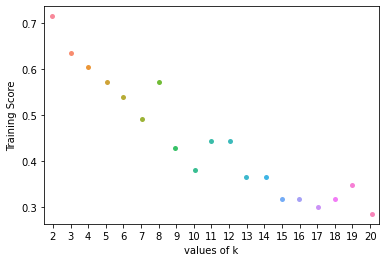

In [ ]:
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()
# function to show plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


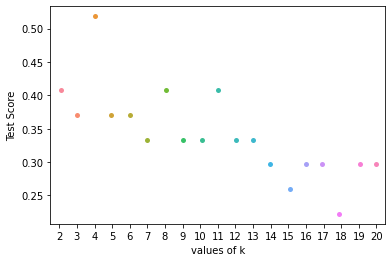

In [ ]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

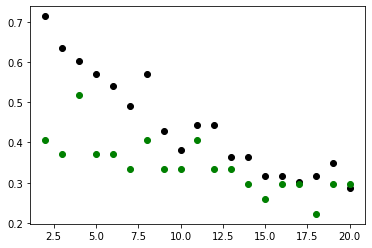

In [ ]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()
# For overlapping scatter plots

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_scores = cross_val_score(clf, X, Y, cv=2)
fpr, tpr, threshold = roc_curve(y_test, y_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2 fits failed out of a total of 2.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "/usr/local/l

ValueError: ignored

In [ ]:
import sklearn
print(sklearn.metrics.confusion_matrix(y_train,y_test))

ValueError: ignored